,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,135
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,142
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


,chol_r,chol,thalach_r,oldpeak_r
0,-0.110236,233,-0.092308,0.9375
1,0.157480,250,1.046154,1.6875
2,-0.566929,204,0.584615,0.3750
3,-0.062992,236,0.769231,0.0000
4,1.795276,354,0.307692,-0.1250
...,...,...,...,...
298,0.015748,241,-0.923077,-0.3750
299,0.377953,264,-0.646154,0.2500
300,-0.740157,193,-0.369231,1.6250
301,-1.716535,131,-1.169231,0.2500


<AxesSubplot: >

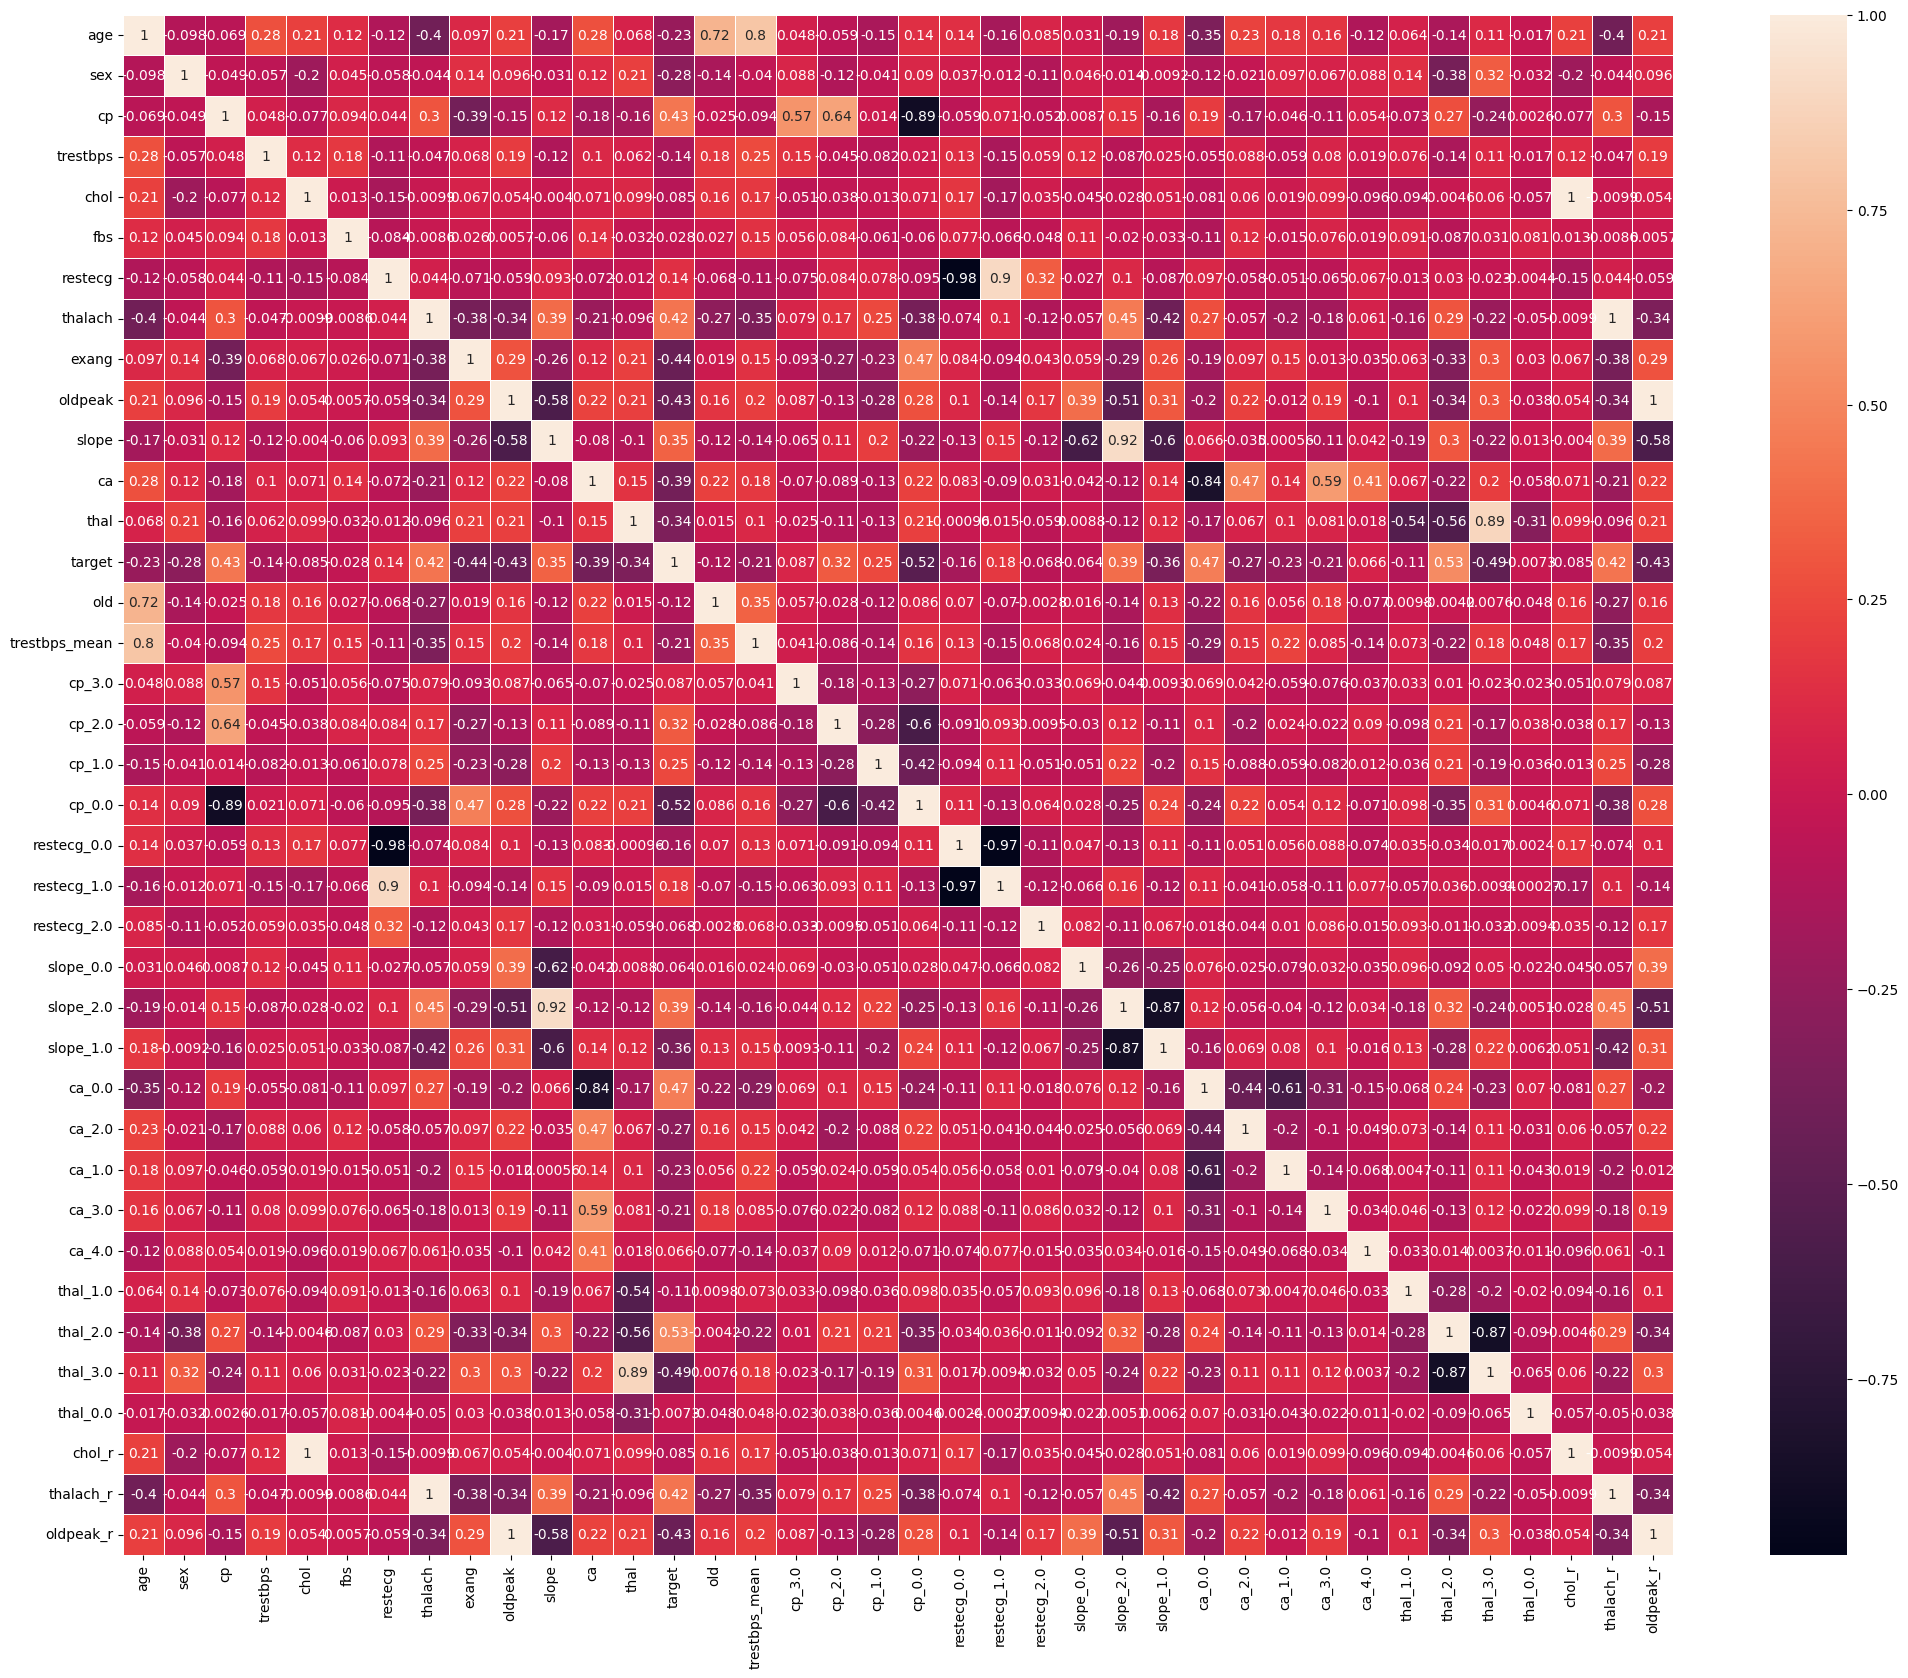

In [57]:
import pandas as pd
df = pd.read_csv('data/heart.csv')

df['old'] = df['age'].apply(lambda x: 1 if x>60 else 0)
df['old'].sum()
if [df['sex'] == 1]:
    df['trestbps_mean'] = df['age'].apply(lambda x:
    123 if x<20 
    else 126 if (x>20 and x<30)
    else 129 if (x>30 and x<40)
    else 135 if (x>40 and x<50)
    else 142)
else:
    df['trestbps_mean'] = df['age'].apply(lambda x:
    116 if x<20 
    else 120 if (x>20 and x<30)
    else 127 if (x>30 and x<40)
    else 137 if (x>40 and x<50)
    else 144 if (x>50 and x<60)
    else 159
    )
df['trestbps_mean'].iloc[300]
df
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=True)
type_bin = encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
df1 = pd.concat([df, type_bin], axis=1)
from sklearn import preprocessing

# нормализация с помощью RobustScaler одного или нескольких столбцов DF 
r_scaler = preprocessing.RobustScaler()
display(df)
df1[['chol_r', 'thalach_r']] = r_scaler.fit_transform(df1[['chol', 'thalach']])

#либо
from sklearn.preprocessing import RobustScaler
df1['oldpeak_r'] = RobustScaler().fit_transform(pd.DataFrame(df1[['oldpeak']]))

display(df1[['chol_r', 'chol', 'thalach_r', 'oldpeak_r']])

import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (25,20))
sns.heatmap(df1.corr(), annot = True, linewidths = .5, ax = ax)



